In [155]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [156]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [158]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [160]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [161]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [163]:
inspector = inspect(engine)

In [164]:
[print(x['name']) for x in inspector.get_columns('measurement')]

id
station
date
prcp
tobs


[None, None, None, None, None]

In [165]:
[print(x['name']) for x in inspector.get_columns('station')]

id
station
name
latitude
longitude
elevation


[None, None, None, None, None, None]

# Exploratory Precipitation Analysis

In [166]:
# Find the most recent date in the data set.
dates_desc = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
dates_desc[0]

('2017-08-23',)

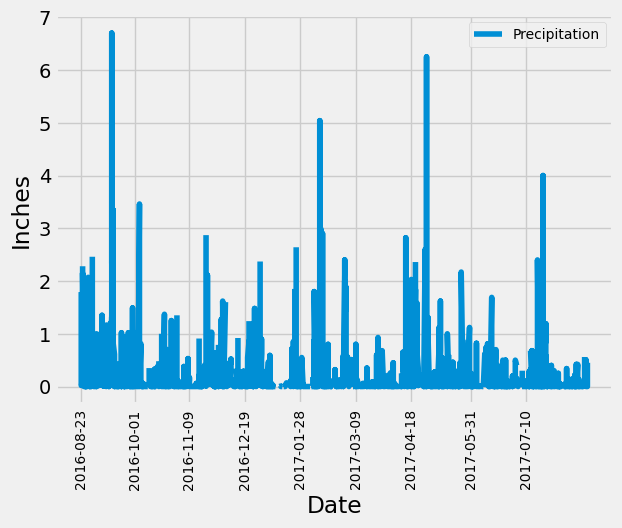

In [167]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
one_year_prev= latest - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prev).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(year_precip, columns = ['date','prcp'])

# Sort the dataframe by date
precip_df.sort_values(['date'], inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_df['date'], precip_df['prcp'])
plt.legend(labels = ['Precipitation'], fontsize = 10)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(['2016-08-23',
            '2016-10-01',
            '2016-11-09',
            '2016-12-19',
            '2017-01-28',
            '2017-03-09',
            '2017-04-18',
            '2017-05-31',
            '2017-07-10'], 
           fontsize = 10, 
           rotation = 'vertical')

plt.show()

In [100]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [121]:
[print(x['name']) for x in inspector.get_columns('Station')]

id
station
name
latitude
longitude
elevation


[None, None, None, None, None, None]

In [101]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [118]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [141]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_temp = session.query(Measurement.tobs).filter(Measurement.station == a).all()
active_temp_df = pd.DataFrame(active_temp)
active_temp_df

print(f"Lowest temp: {min(active_temp_df['tobs'])}")
print(f"Highest temp: {max(active_temp_df['tobs'])}")
print(f"Average temp: {round(np.mean(active_temp_df['tobs']),1)}")

Lowest temp: 54.0
Highest temp: 85.0
Average temp: 71.7


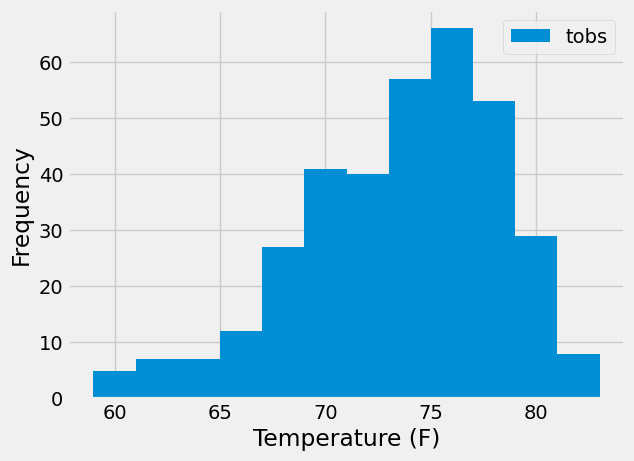

In [153]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp_year = session.query(Measurement.tobs).filter((Measurement.station == active_stations[0][0]) & (Measurement.date >= one_year_prev)).all()
active_temp_year_df = pd.DataFrame(active_temp_year, columns = ['Temp'])

plt.hist(active_temp_year_df,bins = 12)

plt.legend(labels = ['tobs'])
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')

plt.show()

# Close Session

In [154]:
# Close Session
session.close()